In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/PCIA-Data/
%ls


/content/drive/.shortcut-targets-by-id/1nE9uq4hrGHg2QSYlcjCaKV0rIS72lkPQ/Corneal scar resolved
 660633_0.433413001567664410.JPG   image170.JPG   image40.JPG
 783660_0.921041001592888082.JPG   image171.JPG   image41.JPG
 783837_0.818384001592907565.JPG   image184.jpg   image54.JPG
 image100.JPG                      image185.jpg   image55.JPG
 image125.JPG                      image1.jpg     image67.JPG
 image126.JPG                      image200.jpg   image68.JPG
 image139.JPG                      image201.jpg   image83.JPG
 image140.JPG                      image216.png   image84.JPG
 image14.JPG                       image27.JPG    image99.JPG
 image153.JPG                      image28.JPG   'Infected - resolved'/
 image154.JPG                      image2.jpg


### Processing 

In [2]:
!git clone https://github.com/th2l/Eye_VR_Segmentation.git

Cloning into 'Eye_VR_Segmentation'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 92 (delta 29), reused 26 (delta 6), pack-reused 0
Unpacking objects: 100% (92/92), done.


In [4]:
%ls
%cd Eye_VR_Segmentation/

drive/  eye_data/  Eye_VR_Segmentation/  sample_data/
/content/Eye_VR_Segmentation


In [6]:
!python3 test.py --checkpoints 'checkpoint-subs35-best.pt'

python3: can't open file 'test.py': [Errno 2] No such file or directory


### Segementation


(224, 224, 3)


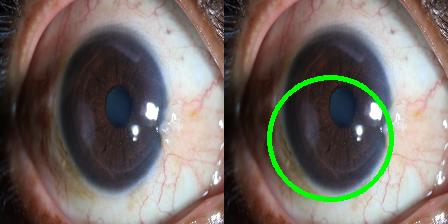

In [ ]:
###--- HOUGH TRANSFORM ---###

output = img_new.copy()
gray = cv2.cvtColor(img_new, cv2.COLOR_BGR2GRAY)
# detect circles in the image
print(img_new.shape)
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=35,minRadius=50,maxRadius=75)
#circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 100)
# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		cv2.circle(output, (x, y), r, (0, 255, 0), 2)
	# show the output image
	cv2_imshow(np.hstack([img_new, output]))
	#cv2.waitKey(0)
#Detecting the circles is handled by the c